In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import os

%matplotlib inline
warnings.filterwarnings("ignore")

In [28]:
working_directory = "\\".join(os.getcwd().split("\\")[:-1])
DATASETS = os.path.join(working_directory, "data")
PROCESSED_DATASETS = os.path.join(DATASETS, "processed")
parquet_name = os.path.join(PROCESSED_DATASETS, "bfrss2021_selected_brotli.parquet")

In [29]:
df = pd.read_parquet(parquet_name)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438693 entries, 0 to 438692
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   SEXVAR    438693 non-null  float64
 1   _IMPRACE  438693 non-null  float64
 2   _AGE65YR  438693 non-null  float64
 3   GENHLTH   438689 non-null  float64
 4   _RFBMI5   438693 non-null  float64
 5   _TOTINDA  438693 non-null  float64
 6   _SMOKER3  438693 non-null  float64
 7   DRNKANY5  438693 non-null  float64
 8   DIABETE4  438690 non-null  float64
 9   CVDSTRK3  438691 non-null  float64
 10  CVDCRHD4  438691 non-null  float64
 11  CVDINFR4  438691 non-null  float64
dtypes: float64(12)
memory usage: 40.2 MB


,SEXVAR,_IMPRACE,_AGE65YR,GENHLTH,_RFBMI5,_TOTINDA,_SMOKER3,DRNKANY5,DIABETE4,CVDSTRK3,CVDCRHD4,CVDINFR4
0,2.0,1.0,2.0,5.0,1.0,2.0,3.0,2.0,3.0,2.0,2.0,2.0
1,2.0,2.0,2.0,3.0,9.0,1.0,4.0,2.0,1.0,2.0,1.0,2.0
2,2.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,1.0,2.0,1.0,2.0
3,2.0,1.0,1.0,2.0,2.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0
4,1.0,6.0,2.0,5.0,2.0,1.0,4.0,2.0,1.0,1.0,7.0,1.0


## **Reading Data and Selecting The Variables**


**Looking for Missing Values and Handling Them**


Since missing values are very few compared to the size of the data, there is no problem in deleting them.


In [30]:
df.isnull().sum()
df = df.dropna()

SEXVAR      0
_IMPRACE    0
_AGE65YR    0
GENHLTH     4
_RFBMI5     0
_TOTINDA    0
_SMOKER3    0
DRNKANY5    0
DIABETE4    3
CVDSTRK3    2
CVDCRHD4    2
CVDINFR4    2
dtype: int64

## **Data Cleaning and Exploration**


**SEXVAR**


SEXVAR column contains participants gender information. 1 means male and 2 means female. For better reading, the column renamed as 'Gender'.


SEXVAR
2.0    234878
1.0    203809
Name: count, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

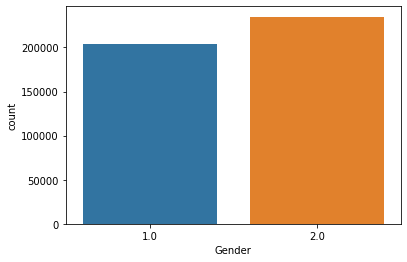

In [31]:
df["SEXVAR"].value_counts()
df = df.rename(columns={"SEXVAR": "Gender"})
sns.countplot(x="Gender", data=df)

**\_IMPRACE**


The \_IMPRACE column contains participants race information.

- 1 means White
- 2 means Black
- 3 means Asian
- 4 means American Indian/Alaskan Native
- 5 means Hispanic
- 6 means Other race

For better reading, the column renamed as 'Race'.


_IMPRACE
1.0    332217
5.0     38688
2.0     33132
6.0     15683
3.0     11557
4.0      7410
Name: count, dtype: int64

<AxesSubplot:xlabel='Race', ylabel='count'>

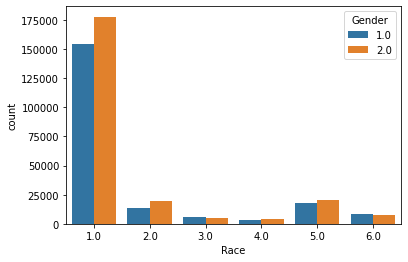

In [32]:
df["_IMPRACE"].value_counts()
df = df.rename(columns={"_IMPRACE": "Race"})
sns.countplot(x="Race", hue="Gender", data=df)

**\_AGE65YR**


The \_AGE65YR column contains information about the age of the participants. Participants aged 65 and older are marked as 2, while younger ones are marked as 1. 3 means missing values and they removed.

For better reading, the column renamed as 'Over 65 Years Old'.


_AGE65YR
1.0    276148
2.0    152935
3.0      9604
Name: count, dtype: int64

<AxesSubplot:xlabel='Over_65_Years_Old', ylabel='count'>

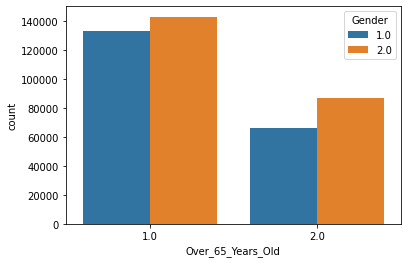

In [33]:
df["_AGE65YR"].value_counts()
df.drop(df[df["_AGE65YR"] == 3].index, inplace=True)
df = df.rename(columns={"_AGE65YR": "Over_65_Years_Old"})
sns.countplot(x="Over_65_Years_Old", hue="Gender", data=df)

**GENHLTH**


The GENHLTH column contains participants general health information.

- 1 means excellent
- 2 means very good
- 3 means good
- 4 means fair
- 5 means poor
- 7 and 9 means Don’t know/Not Sure/Refused

For better reading, the column renamed as 'General Health Status'. Uncertain values removed.


GENHLTH
2.0    146034
3.0    134748
1.0     75697
4.0     53803
5.0     17771
7.0       751
9.0       279
Name: count, dtype: int64

<AxesSubplot:xlabel='General_Health_Status', ylabel='count'>

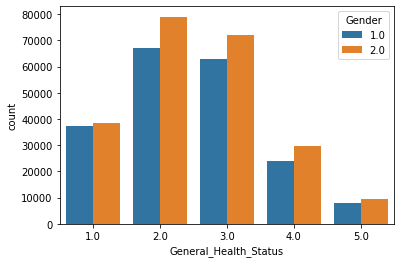

In [34]:
df["GENHLTH"].value_counts()
df = df[(df["GENHLTH"] != 7) & (df["GENHLTH"] != 9)]
df = df.rename(columns={"GENHLTH": "General_Health_Status"})
sns.countplot(x="General_Health_Status", hue="Gender", data=df)

**\_RFBMI5**


The \_RFBMI5 column contains information about the participants' obesity and overweight status using the BMI score. Those with a BMI score of 25 and above marked 2, lower ones marked as 1. 9 means missing values and removed.

For better reading, the column renamed as 'Obesity and Overweight Status'.


_RFBMI5
2.0    266437
1.0    119732
9.0     41884
Name: count, dtype: int64

<AxesSubplot:xlabel='Obesity_Overweight_Status', ylabel='count'>

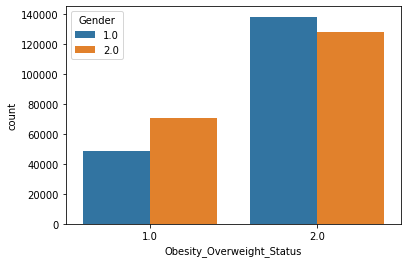

In [35]:
df["_RFBMI5"].value_counts()
df.drop(df[df["_RFBMI5"] == 9].index, inplace=True)
df = df.rename(columns={"_RFBMI5": "Obesity_Overweight_Status"})
sns.countplot(x="Obesity_Overweight_Status", hue="Gender", data=df)

**\_TOTINDA**


In the \_TOTINDA column, participants who have done physical activity or exercise outside of their regular job in the last 30 days are marked with 1. Participants who stated that they did not do it are marked with 2. 9 means missing values and removed.

For better reading, the column has been renamed to 'Physical Activity Status'.


_TOTINDA
1.0    293110
2.0     92426
9.0       633
Name: count, dtype: int64

<AxesSubplot:xlabel='Physical_Activity_Status', ylabel='count'>

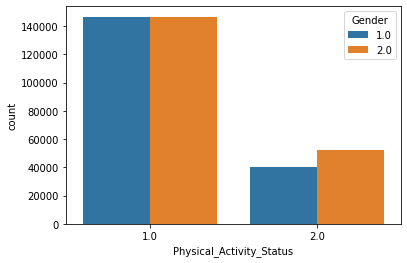

In [36]:
df["_TOTINDA"].value_counts()
df.drop(df[df["_TOTINDA"] == 9].index, inplace=True)
df = df.rename(columns={"_TOTINDA": "Physical_Activity_Status"})
sns.countplot(x="Physical_Activity_Status", hue="Gender", data=df)

**\_SMOKER3**


The \_SMOKER3 column contains information about participants tobacco usage.

- 1 means Everyday smoker
- 2 means Someday smoker
- 3 means Former smoker
- 4 means Non-smoker
- 9 means Don’t know/Not Sure/Refused

For better reading, the column renamed as 'Tobacco Usage'. Uncertain values removed. Since the effects of smoking some days and smoking everyday on heart attack are not very different, these two values were combined and all the variables were renamed.

After editing:

- 1 means smoker
- 2 means former smoker
- 3 means non-smoker


_SMOKER3
4.0    221702
3.0    104555
1.0     36561
2.0     13910
9.0      8808
Name: count, dtype: int64

<AxesSubplot:xlabel='Tobacco_Usage', ylabel='count'>

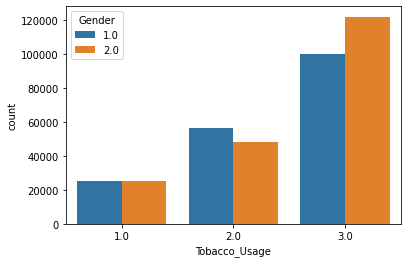

In [37]:
df["_SMOKER3"].value_counts()
df.drop(df[df["_SMOKER3"] == 9].index, inplace=True)
chg = {2: 1, 3: 2, 4: 3}
df["_SMOKER3"].replace(to_replace=chg, inplace=True)
df = df.rename(columns={"_SMOKER3": "Tobacco_Usage"})
sns.countplot(x="Tobacco_Usage", hue="Gender", data=df)

**DRNKANY5**


In the DRNKANY5 column, participants who having had at least one drink of alcohol in the past 30 days are marked with 1. Participants who stated that they did not drink it are marked with 2. 9 means missing values. 7 means Don’t know/Not Sure. Both of them removed.

For better reading, the column has been renamed to 'Physical Activity Status'.


DRNKANY5
1.0    196215
2.0    174114
9.0      3498
7.0      2901
Name: count, dtype: int64

<AxesSubplot:xlabel='Alcohol_Usage', ylabel='count'>

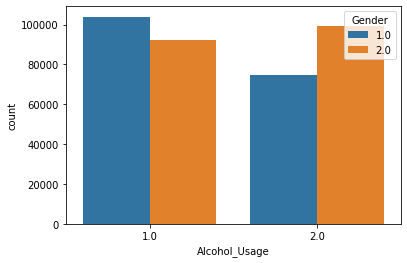

In [38]:
df["DRNKANY5"].value_counts()
df = df[(df["DRNKANY5"] != 7) & (df["DRNKANY5"] != 9)]
df = df.rename(columns={"DRNKANY5": "Alcohol_Usage"})
sns.countplot(x="Alcohol_Usage", hue="Gender", data=df)

**DIABETE4**


The DIABETE4 column contains information about participants diabetes mellitus.

- 1 means Has Diabetes
- 2 means Has Diabetes but Only During Pregnancy Period just for Female Participants
- 3 means Not Has Diabetes
- 4 means Has Pre-diabetes or Borberline Diabetes
- 7 means Don’t know/Not Sure
- 9 means Refused

For better reading, the column renamed as 'Diabetes Status'. Uncertain values removed. Since the effects of pregnancy diabetes on heart attack are not very important, they were combined with 'Not Has Diabetes'. On the other hand, since pre-diabetes or borderline diabetes is associated with heart diseases, these were combined with 'Has Diabetes'.

After editing:

- 1 means Has Diabetes
- 2 means Not Has Diabetes


DIABETE4
3.0    308901
1.0     49227
4.0      8572
2.0      3145
7.0       433
9.0        51
Name: count, dtype: int64

<AxesSubplot:xlabel='Diabetes_Status', ylabel='count'>

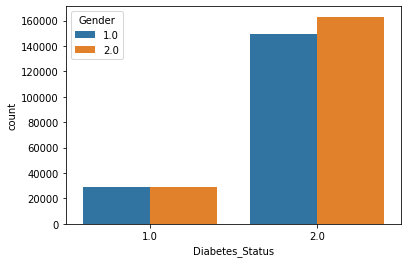

In [39]:
df["DIABETE4"].value_counts()
df = df[(df["DIABETE4"] != 7) & (df["DIABETE4"] != 9)]
chg = {3: 2, 4: 1}
df["DIABETE4"].replace(to_replace=chg, inplace=True)
df = df.rename(columns={"DIABETE4": "Diabetes_Status"})
sns.countplot(x="Diabetes_Status", hue="Gender", data=df)

**CVDSTRK3**


In the CVDSTRK3 column, participants who had stroke at least one time in their life are marked with 1. Participants who stated that they did not had it are marked with 2. 9 means missing values. 7 means Don’t know/Not Sure. Both of them removed.

For better reading, the column has been renamed to 'Stroke Status'.


CVDSTRK3
2.0    354046
1.0     14886
7.0       880
9.0        33
Name: count, dtype: int64

<AxesSubplot:xlabel='Stroke_Status', ylabel='count'>

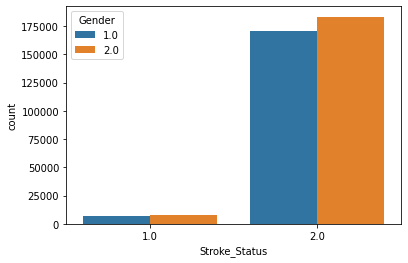

In [40]:
df["CVDSTRK3"].value_counts()
df = df[(df["CVDSTRK3"] != 7) & (df["CVDSTRK3"] != 9)]
df = df.rename(columns={"CVDSTRK3": "Stroke_Status"})
sns.countplot(x="Stroke_Status", hue="Gender", data=df)

**CVDCRHD4**


In the CVDCRHD4 column, participants who had angina or coronary heart disease are marked with 1. Participants who stated that they did not had it are marked with 2. 9 means missing values. 7 means Don’t know/Not Sure. Both of them removed.

For better reading, the column has been renamed to 'Coronary Heart Disease Status'.


CVDCRHD4
2.0    345845
1.0     19964
7.0      3075
9.0        48
Name: count, dtype: int64

<AxesSubplot:xlabel='Coronary_Heart_Disease_Status', ylabel='count'>

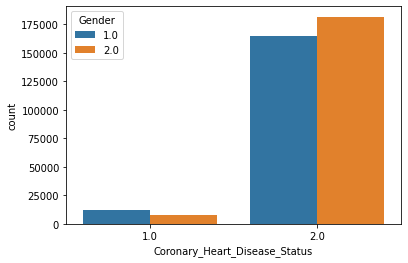

In [41]:
df["CVDCRHD4"].value_counts()
df = df[(df["CVDCRHD4"] != 7) & (df["CVDCRHD4"] != 9)]
df = df.rename(columns={"CVDCRHD4": "Coronary_Heart_Disease_Status"})
sns.countplot(x="Coronary_Heart_Disease_Status", hue="Gender", data=df)

**CVDINFR4**


In the CVDINFR4 column, participants who had a heart attack also called a myocardial infarction are marked with 1. Participants who stated that they did not had it are marked with 2. 9 means missing values. 7 means Don’t know/Not Sure. Both of them removed.

For better reading, the column has been renamed to 'Heart Attack Status'.

After editing:

- 0 means Had Heart Attack
- 1 means Not Had Heart Attack

This variable is the dependent variable of the project.


CVDINFR4
2.0    345587
1.0     18801
7.0      1389
9.0        32
Name: count, dtype: int64

<AxesSubplot:xlabel='Heart_Attack_Status', ylabel='count'>

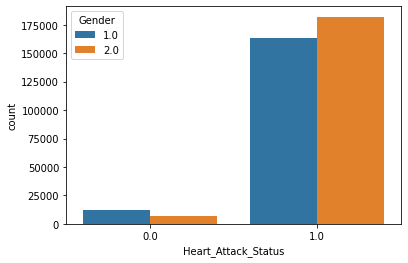

In [42]:
df["CVDINFR4"].value_counts()
df = df[(df["CVDINFR4"] != 7) & (df["CVDINFR4"] != 9)]
chg = {1: 0, 2: 1}
df["CVDINFR4"].replace(to_replace=chg, inplace=True)
df = df.rename(columns={"CVDINFR4": "Heart_Attack_Status"})
sns.countplot(x="Heart_Attack_Status", hue="Gender", data=df)

**Last Shape of Data Set**


In [43]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 364388 entries, 0 to 438692
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Gender                         364388 non-null  float64
 1   Race                           364388 non-null  float64
 2   Over_65_Years_Old              364388 non-null  float64
 3   General_Health_Status          364388 non-null  float64
 4   Obesity_Overweight_Status      364388 non-null  float64
 5   Physical_Activity_Status       364388 non-null  float64
 6   Tobacco_Usage                  364388 non-null  float64
 7   Alcohol_Usage                  364388 non-null  float64
 8   Diabetes_Status                364388 non-null  float64
 9   Stroke_Status                  364388 non-null  float64
 10  Coronary_Heart_Disease_Status  364388 non-null  float64
 11  Heart_Attack_Status            364388 non-null  float64
dtypes: float64(12)
memory usage: 36.1 M

,Gender,Race,Over_65_Years_Old,General_Health_Status,Obesity_Overweight_Status,Physical_Activity_Status,Tobacco_Usage,Alcohol_Usage,Diabetes_Status,Stroke_Status,Coronary_Heart_Disease_Status,Heart_Attack_Status
0,2.0,1.0,2.0,5.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
2,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,1.0,2.0,1.0,1.0
3,2.0,1.0,1.0,2.0,2.0,1.0,3.0,1.0,1.0,2.0,2.0,1.0
5,1.0,1.0,2.0,3.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
6,1.0,1.0,1.0,3.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,1.0


array([[<AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Race'}>,
        <AxesSubplot:title={'center':'Over_65_Years_Old'}>],
       [<AxesSubplot:title={'center':'General_Health_Status'}>,
        <AxesSubplot:title={'center':'Obesity_Overweight_Status'}>,
        <AxesSubplot:title={'center':'Physical_Activity_Status'}>],
       [<AxesSubplot:title={'center':'Tobacco_Usage'}>,
        <AxesSubplot:title={'center':'Alcohol_Usage'}>,
        <AxesSubplot:title={'center':'Diabetes_Status'}>],
       [<AxesSubplot:title={'center':'Stroke_Status'}>,
        <AxesSubplot:title={'center':'Coronary_Heart_Disease_Status'}>,
        <AxesSubplot:title={'center':'Heart_Attack_Status'}>]],
      dtype=object)

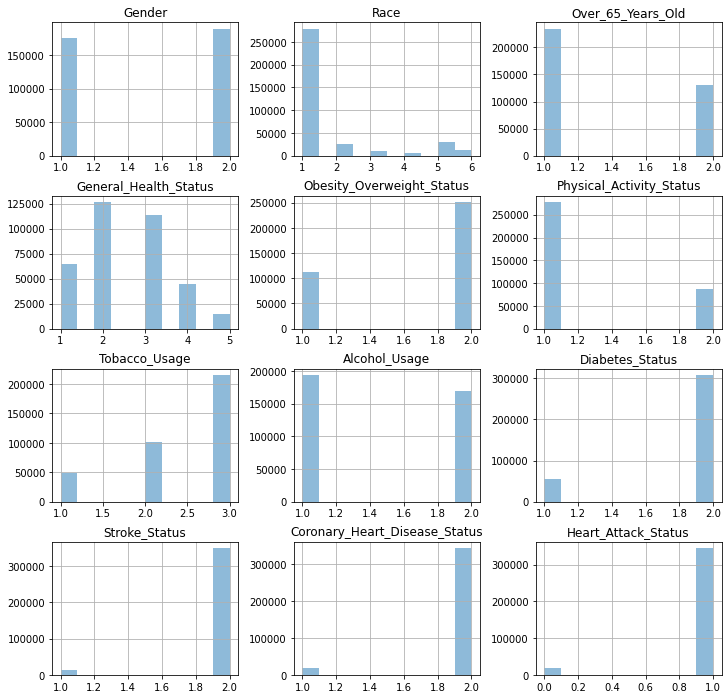

In [44]:
df.hist(alpha=0.5, figsize=(12, 12))
plt.show()

<Figure size 720x360 with 0 Axes>

<AxesSubplot:>

,Gender,Race,Over_65_Years_Old,General_Health_Status,Obesity_Overweight_Status,Physical_Activity_Status,Tobacco_Usage,Alcohol_Usage,Diabetes_Status,Stroke_Status,Coronary_Heart_Disease_Status,Heart_Attack_Status
Gender,1.000000,-0.009887,0.047885,0.020361,-0.103943,0.057943,0.058812,0.100149,0.018061,-0.006127,0.054474,0.068326
Race,-0.009887,1.000000,-0.158111,0.048044,0.018176,0.039211,0.026883,0.055494,-0.026489,0.012485,0.036017,0.019951
Over_65_Years_Old,0.047885,-0.158111,1.000000,0.125940,-0.020390,0.092056,-0.005409,0.127083,-0.164055,-0.119760,-0.178603,-0.151590
General_Health_Status,0.020361,0.048044,0.125940,1.000000,0.145839,0.278375,-0.181105,0.177601,-0.272949,-0.159483,-0.199421,-0.186340
Obesity_Overweight_Status,-0.103943,0.018176,-0.020390,0.145839,1.000000,0.081679,-0.005108,0.028338,-0.150207,-0.011141,-0.040264,-0.032917
Physical_Activity_Status,0.057943,0.039211,0.092056,0.278375,0.081679,1.000000,-0.113160,0.157805,-0.139639,-0.080692,-0.075417,-0.079620
Tobacco_Usage,0.058812,0.026883,-0.005409,-0.181105,-0.005108,-0.113160,1.000000,0.022020,0.038581,0.056058,0.060678,0.084863
Alcohol_Usage,0.100149,0.055494,0.127083,0.177601,0.028338,0.157805,0.022020,1.000000,-0.143517,-0.071543,-0.064445,-0.070594
Diabetes_Status,0.018061,-0.026489,-0.164055,-0.272949,-0.150207,-0.139639,0.038581,-0.143517,1.000000,0.100716,0.149446,0.143412
Stroke_Status,-0.006127,0.012485,-0.119760,-0.159483,-0.011141,-0.080692,0.056058,-0.071543,0.100716,1.000000,0.143234,0.175232


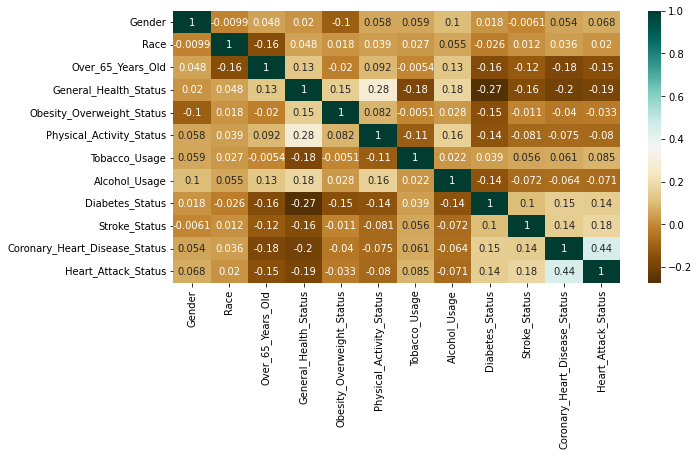

In [45]:
plt.figure(figsize=(10, 5))
c = df.corr()
sns.heatmap(c, cmap="BrBG", annot=True)
c